In [193]:
import string
from collections import defaultdict
import unicodedata
import matplotlib.pyplot as plt
import time

In [192]:
numbers = ['0','1','2','3','4','5','6','7','8','9']

Обработка текстов и создание словарей с n-граммами

In [177]:
def dictionaries(file_path, numbers, n, max_words=3000): # подставить нужное значение размера текста

    with open(file_path, 'r', encoding='utf-8') as text_file:
        text = text_file.read()

    for i in string.punctuation:
        text = text.replace(i, '')

    for number in numbers:
        text = text.replace(number, '')

    text = text.replace('\n', ' ')
    text = text.strip()
    text = text.lower()

    text = unicodedata.normalize('NFD', text)

    text = ''.join(c for c in text if unicodedata.category(c) != 'Mn')

    ngrams = defaultdict(int)
    text = text[:max_words]

    for j in range(len(text) - (n-1)):
        ngram = text[j:j+n]
        ngrams[ngram] += 1

    return dict(ngrams)

Визуализация

In [178]:
def plot_frequencies(ngrams_dict, title):
    plt.figure(figsize=(10, 5))
    plt.bar(ngrams_dict.keys(), ngrams_dict.values())
    plt.xlabel('n-граммы')
    plt.ylabel('Частота')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [179]:
def get_top_ngrams(ngrams_dict, top_n=20):
    sorted_ngrams = sorted(ngrams_dict.items(), key=lambda item: item[1], reverse=True)
    return dict(sorted_ngrams[:top_n])

In [180]:
def plot_frequencies_in_row(ngrams_dicts, titles):
    num_plots = len(ngrams_dicts)
    fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

    for ax, (ngrams_dict, title) in zip(axs, zip(ngrams_dicts, titles)):
        ax.bar(ngrams_dict.keys(), ngrams_dict.values())
        ax.set_xlabel('n-граммы')
        ax.set_ylabel('Частота')
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Подсчет схожести словарей с n-граммами языков и тестового текста

In [181]:
def calculate_similarity(test_ngrams, lang_ngrams):
    total = sum(test_ngrams.values())
    if total == 0:
        return 0.0
    similarity = sum(min(count, lang_ngrams.get(ngram, 0)) for ngram, count in test_ngrams.items())
    return similarity / total

Выбор наиболее похожих словарей

In [182]:
def predict_language(test_text, language_dictionaries, n):
    test_ngrams = dictionaries(test_text, numbers, n)

    similarities = {}
    for language, ngrams in language_dictionaries.items():
        similarity = calculate_similarity(test_ngrams, ngrams)
        similarities[language] = similarity

    sorted_languages = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

    return sorted_languages

Выбор наиболее оптимального значения n

In [183]:
def evaluate_n_performance(test_text, true_language, max_n=6):
    results = []

    for n in range(2, max_n + 1):
        start_time = time.time()

        language_dictionaries = {
            'english': dictionaries('english.txt', numbers, n),
            'french': dictionaries('french.txt', numbers, n),
            'german': dictionaries('german.txt', numbers, n),
            'italian': dictionaries('italian.txt', numbers, n),
            'spanish': dictionaries('spanish.txt', numbers, n),
            'portuguese': dictionaries('portuguese.txt', numbers, n),
            'dutch': dictionaries('dutch.txt', numbers, n),
            'danish': dictionaries('danish.txt', numbers, n),
            'swedish': dictionaries('swedish.txt', numbers, n),
            'norwegian': dictionaries('norwegian.txt', numbers, n),
            'romanian': dictionaries('romanian.txt', numbers, n),
            'polish': dictionaries('polish.txt', numbers, n),
            'lithuanian': dictionaries('lithuanian.txt', numbers, n),
            'finnish': dictionaries('finnish.txt', numbers, n),
            'latin': dictionaries('latin.txt', numbers, n)
        }

        predicted_languages = predict_language(test_text, language_dictionaries, n)
        elapsed_time = time.time() - start_time

        top_score = predicted_languages[0][1] if predicted_languages else 0

        accuracy = 1.0 if any(true_language in lang[0] for lang in predicted_languages[:3]) else 0.0

        results.append({
            'n': n,
            'time': elapsed_time,
            'top_score': top_score,
            'accuracy': accuracy,
            'predictions': predicted_languages
        })

        print(f"\nРезультаты для n={n}:")
        print(f"Скорость работы: {elapsed_time:.2f}с")
        print(f"Схожесть (топ 3): {accuracy:.0%}")
        print("Предсказания:")
        for lang, score in predicted_languages[:3]:
            print(f"{lang}: {score:.2%}")

    return results

Вывод предварительных результатов для всех значений n

In [184]:
true_language = 'dutch'  # подставить верный вариант языка
test_text = 'test_dutch.txt'  # подставить нужный тестовый текст

performance_results = evaluate_n_performance(test_text, true_language)


Результаты для n=2:
Скорость работы: 0.09с
Схожесть (топ 3): 100%
Предсказания:
dutch: 82.06%
german: 75.95%
swedish: 73.05%

Результаты для n=3:
Скорость работы: 0.10с
Схожесть (топ 3): 100%
Предсказания:
dutch: 49.85%
german: 41.22%
swedish: 37.81%

Результаты для n=4:
Скорость работы: 0.09с
Схожесть (топ 3): 100%
Предсказания:
dutch: 27.01%
german: 18.37%
danish: 14.86%

Результаты для n=5:
Скорость работы: 0.09с
Схожесть (топ 3): 100%
Предсказания:
dutch: 12.16%
german: 7.14%
danish: 3.62%

Результаты для n=6:
Скорость работы: 0.08с
Схожесть (топ 3): 100%
Предсказания:
dutch: 5.03%
german: 2.62%
danish: 1.01%


Визуализация оптимальности значений n

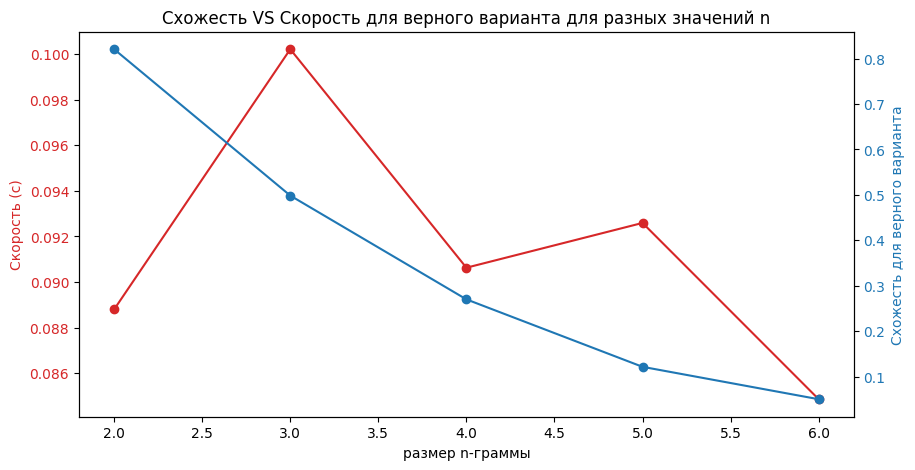

In [185]:
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('размер n-граммы')
ax1.set_ylabel('Скорость (с)', color=color)
ax1.plot([r['n'] for r in performance_results], [r['time'] for r in performance_results],
         color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Схожесть для верного варианта', color=color)
ax2.plot([r['n'] for r in performance_results], [r['top_score'] for r in performance_results],
         color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Схожесть VS Скорость для верного варианта для разных значений n')
plt.show()

Вывод наиболее оптимального значения n

In [186]:
optimal_n = None
max_score = -1
min_time = float('inf')

for result in performance_results:

    true_lang_score = next((score for lang, score in result['predictions'] if lang == true_language), 0)

    if (true_lang_score > max_score) or \
       (true_lang_score == max_score and result['time'] < min_time):
        max_score = true_lang_score
        min_time = result['time']
        optimal_n = result['n']

print(f"Оптимальный размер n-грамм: {optimal_n}")
print(f"  - Схожесть для {true_language}: {max_score:.2%}")
print(f"  - Скорость: {min_time:.2f} секунд")

Оптимальный размер n-грамм: 2
  - Схожесть для dutch: 82.06%
  - Скорость: 0.09 секунд


In [187]:
n = optimal_n

language_dictionaries = {
    'english': dictionaries('english.txt', numbers, n),
    'french': dictionaries('french.txt', numbers, n),
    'german': dictionaries('german.txt', numbers, n),
    'italian': dictionaries('italian.txt', numbers, n),
    'spanish': dictionaries('spanish.txt', numbers, n),
    'portuguese': dictionaries('portuguese.txt', numbers, n),
    'dutch': dictionaries('dutch.txt', numbers, n),
    'danish': dictionaries('danish.txt', numbers, n),
    'swedish': dictionaries('swedish.txt', numbers, n),
    'norwegian': dictionaries('norwegian.txt', numbers, n),
    'romanian': dictionaries('romanian.txt', numbers, n),
    'polish': dictionaries('polish.txt', numbers, n),
    'lithuanian': dictionaries('lithuanian.txt', numbers, n),
    'finnish': dictionaries('finnish.txt', numbers, n),
    'latin': dictionaries('latin.txt', numbers, n)
        }

Вывод предсказания для наиболее оптимального значения n

In [188]:
predicted_languages = predict_language(test_text, language_dictionaries, n)
print(f"Топ-5 предсказания для оптимального n={n}:")
for lang, score in predicted_languages[:5]:
    print(f"{lang}: {score:.2%}")

Топ-5 предсказания для оптимального n=2:
dutch: 82.06%
german: 75.95%
swedish: 73.05%
norwegian: 72.85%
danish: 69.24%


Вывод графиков наиболее частотных n-грамм для визуального сравнения

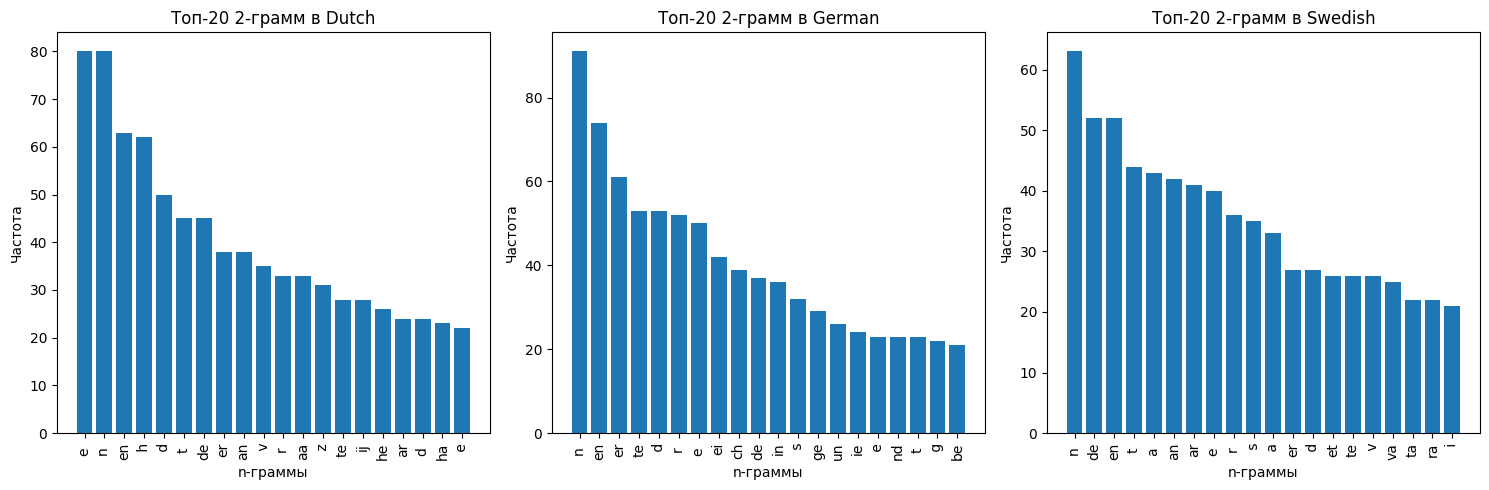

In [189]:
top_language_ngrams_list = []
titles = []

for language, _ in predicted_languages[:3]:
    top_language_ngrams = get_top_ngrams(language_dictionaries[language])
    top_language_ngrams_list.append(top_language_ngrams)
    titles.append(f'Топ-20 {n}-грамм в {language.capitalize()}')

plot_frequencies_in_row(top_language_ngrams_list, titles)

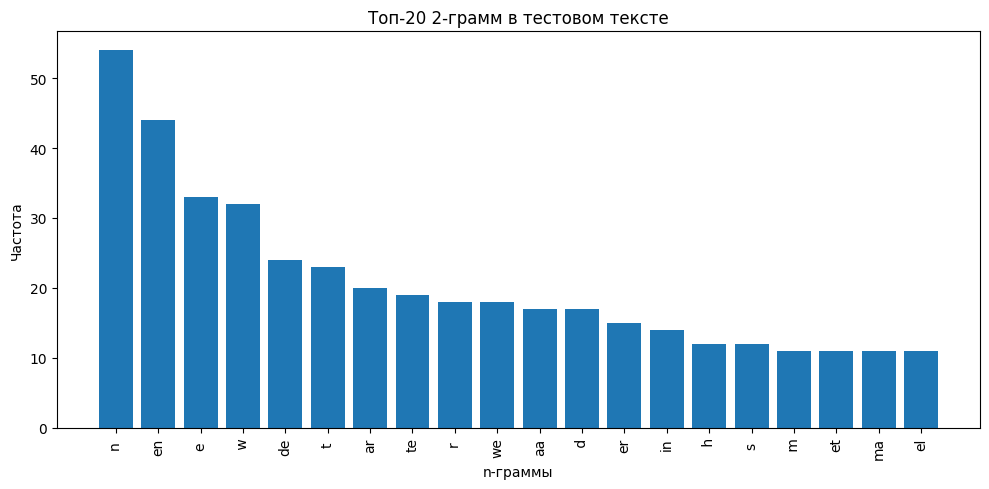

In [190]:
test_ngrams = dictionaries(test_text, numbers, n)
top_test_ngrams = get_top_ngrams(test_ngrams)
plot_frequencies(top_test_ngrams, f'Топ-20 {n}-грамм в тестовом тексте')